# <u>Open Data Example #1: City of Chicago Salaries</u>

*Source for Data Set:* City of Chicago Department of Human Resources

*URL for Data Set:* https://data.cityofchicago.org/Administration-Finance/Current-Employee-Names-Salaries-and-Position-Title/xzkq-xp2w

*Description of Data Set:* "This dataset is a listing of all current City of Chicago employees, complete with full names, departments, positions, and annual salaries. For hourly employees the annual salary is estimated." (Description written by City of Chicago) 

*File Format for Data Set:* CSV file (Comma Separated Values)

*Age of Data Set:* Last updated January 21, 2021

### <u>Import CSV File</u>

In [10]:
# Import pandas module
import pandas as pd
# Read in the csv file (comma separated values)
salary_DF = pd.read_csv("Salaries_2024.csv")
# Print the last three entries of the file

    # The last line of a cell will print automatically!
    # Can sometimes display data differently
salary_DF[-3:]

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
31896,"GRADILLA, IVON",SUPERVISING TRAFFIC CONTROL AIDE,OFFICE OF EMERGENCY MANAGEMENT AND COMMUNICATIONS,F,SALARY,NaN,74844.00,NaN
31897,"SMITH, DORIS J",FOSTER GRANDPARENT,DEPARTMENT OF FAMILY AND SUPPORT SERVICES,P,HOURLY,20.0,NaN,4.0
31898,"POWELL, TIMOTHY M",CHIEF OPERATING ENGINEER,DEPARTMENT OF FLEET AND FACILITY MANAGEMENT,F,SALARY,NaN,143228.76,NaN


Sometimes, the last entry (or the last few entries) in a dataset may be erroneous. Use code similar to below to eliminate them.

    salary_DF = salary_DF.drop(salary_DF.index[-1])

*Note: This doesn't appear to be a problem with the 2022 version of this dataset, so you are unlikely to need to run the above code*

In [11]:
# Use this cell to run the code above (if needed)
salary_DF = salary_DF.drop(salary_DF.index[-1])
# Note: Only run this code if your teacher says you need it

### <u>Question: How many employees are paid by the City of Chicago?</u>

In [12]:
# Print the length of the data frame
print(len(salary_DF))

31898


**<u>Your Answer:</u>** *Write a complete sentence that answers the question here.*

### <u>Modify Data: Create a List of Salaries</u>

In [13]:
# Store all values from the "Annual Salary" column
salary_list = salary_DF["Annual Salary"]


# Print the first 3 entries
salary_list[:3]

0     34176.0
1    102870.0
2     90660.0
Name: Annual Salary, dtype: float64

### <u>Modify Data to be Usable</u>

Step 0: If you have data with dollar signs, we would need to delete these symbols. This year's spreadsheet doesn't have any dollar signs, so we don't need to worry about this. But in previous years, we had to replace dollar signs with empty strings. In your own data projects, you'll want to check if this step is necessary. 

Step 1: Clean data by deleting dollar signs, '$', from the salaries and replace any empty strings with a salary of '0.00' dollars per year.

Step 2: Create a list with only salaries, converted from strings to floating point numbers. For example, the string '84450.0' becomes the floating point number 84450.0.

In [14]:
# This can delete '$' symbols if present before salaries
salary_list = salary_list.replace("$","")

# Convert to floating point number
    # Empty cells --> 0.00
salary_list = salary_list.astype(float)
# Print the last 4 entries
salary_list[-4:]

31894         NaN
31895    102372.0
31896     74844.0
31897         NaN
Name: Annual Salary, dtype: float64

It might come in handy later to have our salaries as floating point numbers. Let's replace the old column in our dataframe (string data) and replace it with our new one (floating point numbers):

In [15]:
# Delete the ORIGINAL data in "Annual Salary" column
del salary_DF["Annual Salary"]
# Replace with our NEW data
salary_DF["Annual Salary"] = salary_list
# Print first 10 entries
salary_DF[:10]

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Hourly Rate,Annual Salary
0,"GARCIA, CHRISTOPHER A",CLERK - BD OF ELECTIONS,BOARD OF ELECTION COMMISSIONERS,F,SALARY,NaN,NaN,34176.0
1,"LEWANDOWSKI, PATRICK E",POLICE OFFICER (ASSIGNED AS DETECTIVE),CHICAGO POLICE DEPARTMENT,F,SALARY,NaN,NaN,102870.0
2,"HARRISON, LETECHIA",SR PROCUREMENT SPECIALIST,DEPARTMENT OF PROCUREMENT SERVICES,F,SALARY,NaN,NaN,90660.0
3,"GONZALEZ, MICHAEL A",POOL MOTOR TRUCK DRIVER,DEPARTMENT OF STREETS AND SANITATION,F,HOURLY,40.0,45.98,NaN
4,"RAMIREZ, RODOLFO",SANITATION LABORER,DEPARTMENT OF STREETS AND SANITATION,F,HOURLY,40.0,40.76,NaN
5,"ASHFORD, MARQUISHA D",INQUIRY AIDE III,OFFICE OF PUBLIC SAFETY ADMINISTRATION,F,SALARY,NaN,NaN,46056.0
6,"GRAY, DERYL R",ALDERMANIC AIDE,CITY COUNCIL,P,HOURLY,20.0,25.00,NaN
7,"MATHIS, DESIREE",PERSONNEL ASSISTANT,OFFICE OF PUBLIC SAFETY ADMINISTRATION,F,SALARY,NaN,NaN,70608.0
8,"MACK, QIANA S",LEAVE OF ABSENCE ADMIN,OFFICE OF PUBLIC SAFETY ADMINISTRATION,F,SALARY,NaN,NaN,66684.0
9,"ZAVALA, JENNY",POLICE OFFICER (ASSIGNED AS DETECTIVE),CHICAGO POLICE DEPARTMENT,F,SALARY,NaN,NaN,106482.0


### <u>Modify Data: Convert to a Numpy Number Array</u>

In [16]:
# Import numpy
import numpy as Numpilious
# Convert data to a numpy array
salary_array = Numpilious.array(salary_list)
# Print the last 30 values
salary_array[-30:]

array([      nan,       nan, 125112.  ,       nan,       nan,  99876.  ,
             nan,       nan,  80448.  , 124011.96, 161082.  , 110766.  ,
             nan,  68196.  ,       nan,  98904.  ,  99876.  ,       nan,
       103524.  , 101052.  , 135144.  ,       nan,       nan, 118830.  ,
             nan,       nan,       nan, 102372.  ,  74844.  ,       nan])

Look closely at this output, and you'll spot a problem: 

Some of our values are listed as "nan" or "not a number." If we are going to do some mathematical calculations with this data, we're going to need to clean the data by removing all instances of "nan." 

_Note: There may be several reasons why the dataset contains "nan" values. In some cases, an employee's salary data might be missing, there may have been a data entry error, an employee may have gone unpaid for a year because of an extended leave, or the employee may be working on a volunteer basis. Since there's no way to know how to interpret these values, it is best for us to do some data cleaning and remove them._ 

In [17]:
# Import numpy as np
import numpy as np
# Eliminate the NaN entries
    # the ~ symbol is interpreted by numpy as "not"
salary_array = salary_array[~np.isnan(salary_array)]
# Print the last 30 entries
salary_array[-30:]

array([ 86016.  , 105936.  , 114654.  ,  98904.  ,  98904.  , 138378.  ,
       111903.96, 101262.  ,  76122.  , 114654.  , 127410.  , 127011.  ,
       114654.  , 101262.  , 109872.  , 125112.  ,  99876.  ,  80448.  ,
       124011.96, 161082.  , 110766.  ,  68196.  ,  98904.  ,  99876.  ,
       103524.  , 101052.  , 135144.  , 118830.  , 102372.  ,  74844.  ])

### <u>Question: What is the average salary for city employees?<u>

In [18]:
# Calculate the average
average = np.average(salary_array)
average

104317.4302253624

**<u>Your Answer:</u>** *Write a complete sentence that answers the question here.*
Based off of calculating the average, I have found that the answer you are looking for is 104319.01018840342 indeed.

### <u>Question: What is the median salary for city employees?</u>

In [19]:
# Find the median value
median = np.median(salary_array)
median

102870.0

**<u>Your Answer:</u>** *Write a complete sentence that answers the question here.*
Based off of calculating the median, I have found that the answer you are looking for is 102870.0 indeed.

**<u>Task:</u>** Use this cell to explain what the *median* of a dataset is.

**<u>Answer:</u>** *Write a complete sentence that answers the question here.*

### <u>Question: What is the number of salaried city employees?</u>

In [20]:
# Find the length of the array
len(salary_array)

24627

**<u>Your Answer:</u>** *Write a complete sentence that answers the question here.*
Based off of calculating the numbers, I have found that the answer you are looking for is 24628 indeed.

### <u>Question: What is the standard deviation of city employee salaries?</u>

In [21]:
# Find the standard deviation
SD_CAPTAIN = np.std(salary_array)
SD_CAPTAIN

25117.542218281338

**<u>Your Answer:</u>** *Write a complete sentence that answers the question here.*
Based off running the numbers, I have found that the answer you are looking for is 25118.256034973623 indeed.

**<u>Task:</u>** Use this cell to explain what the *standard deviation* of a dataset is.

**<u>Your Answer:</u>** *Write a complete sentence that answers the question here.*

### <u>Question: What is the highest salary among city employees?</u>

In [22]:
# Find the max value
MAXIMILLION = np.amax(salary_array)
MAXIMILLION

291696.0

**<u>Your Answer:</u>** *Write a complete sentence that answers the question here
Based off running the numbers, I have found that the answer you are looking for is 291696.0 indeed.

# <u>Question: The highest paid employee of the City of Chicago makes approximately $291,000 a year. Who is it? </u>

In [23]:
# Sort the array in ascending order
Classism = salary_DF.sort_values("Annual Salary", ascending = 0)
# Print first entry only
salary_DF[:1]

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Hourly Rate,Annual Salary
0,"GARCIA, CHRISTOPHER A",CLERK - BD OF ELECTIONS,BOARD OF ELECTION COMMISSIONERS,F,SALARY,NaN,NaN,34176.0


**<u>Your Answer:</u>** *Write a complete sentence that answers the question here.*

### <u>Question: Who earns the top 10 salaries in the City of Chicago?</u>

In [30]:
# Print the first 10 entries of the sorted array
Classism[:10]

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Hourly Rate,Annual Salary
11443,"RHEE, JAMIE L",COMMISSIONER OF AVIATION,CHICAGO DEPARTMENT OF AVIATION,F,SALARY,NaN,NaN,291696.0
11842,"SNELLING, LARRY B",SUPERINTENDENT OF POLICE,CHICAGO POLICE DEPARTMENT,F,SALARY,NaN,NaN,275748.0
8476,"NANCE HOLT, ANNETTE M",FIRE COMMISSIONER,CHICAGO FIRE DEPARTMENT,F,SALARY,NaN,NaN,242508.0
6291,"JOHNSON, BRANDON J",MAYOR,OFFICE OF THE MAYOR,F,SALARY,NaN,NaN,221052.0
1184,"SHERIDAN, MARY L",FIRST DEPUTY FIRE COMMISSIONER,CHICAGO FIRE DEPARTMENT,F,SALARY,NaN,NaN,220260.0
1457,"BROWN, CHRISTOPHER M",COMMISSIONER OF CHICAGO PUBLIC LIBRARY,CHICAGO PUBLIC LIBRARY,F,SALARY,NaN,NaN,217224.0
13186,"GUIDICE, RICHARD J",CHIEF OF STAFF,OFFICE OF THE MAYOR,F,SALARY,NaN,NaN,217224.0
1465,"WALKER, ANNASTASIA M",EXEC DIR - OFFICE OF PUBLIC SAFETY ADM,OFFICE OF PUBLIC SAFETY ADMINISTRATION,F,SALARY,NaN,NaN,217224.0
4760,"FERMAN, MARC A",DEPUTY FIRE COMMISSIONER,CHICAGO FIRE DEPARTMENT,F,SALARY,NaN,NaN,215340.0
12946,"HELMOLD, BRIAN",DEPUTY FIRE COMMISSIONER,CHICAGO FIRE DEPARTMENT,F,SALARY,NaN,NaN,215340.0


**<u>Your Answer:</u>** *Write a complete sentence that addresses the question here. It is okay to refer the reader to the table, since it might be time consuming to list out a long list of 10 people and their job titles here.*

### <u>Visualization: Histogram of Salaries</u>

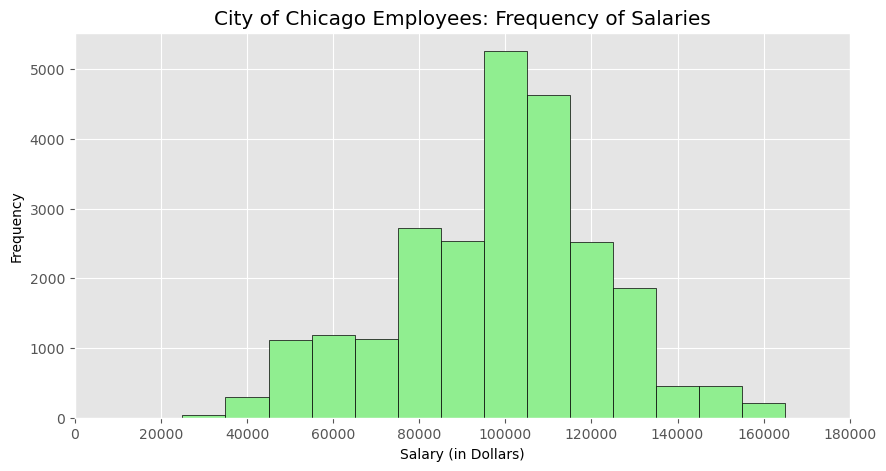

In [36]:
# Import matplotlib
import matplotlib.pyplot as plot
%matplotlib inline

# Create bins array
bins = []
for i in range(18):
    bin = i * 10000
    bins.append(bin)
    
# Graph style
plot.style.use("ggplot")
plot.figure(figsize=(10,5))
plot.xlim([0,180000])

# Create title and lables
plot.title("City of Chicago Employees: Frequency of Salaries")
plot.xlabel("Salary (in Dollars)")
plot.ylabel("Frequency")

# Create histogram
plot.hist(salary_array, bins, align="left", color="lightgreen", edgecolor="black")
plot.show()

### <u>Question: How many employees per department in the City of Chicago?</u>

In [37]:
# Count the number of entries from each department
department_freq = salary_DF["Department"].value_counts()
department_freq

CHICAGO POLICE DEPARTMENT                                    12257
CHICAGO FIRE DEPARTMENT                                       4715
DEPARTMENT OF STREETS AND SANITATION                          2148
CHICAGO DEPARTMENT OF AVIATION                                2054
DEPARTMENT OF WATER MANAGEMENT                                1957
CHICAGO DEPARTMENT OF TRANSPORTATION                          1285
CHICAGO PUBLIC LIBRARY                                        1108
DEPARTMENT OF FLEET AND FACILITY MANAGEMENT                    857
OFFICE OF EMERGENCY MANAGEMENT AND COMMUNICATIONS              848
CHICAGO DEPARTMENT OF PUBLIC HEALTH                            710
DEPARTMENT OF FAMILY AND SUPPORT SERVICES                      583
DEPARTMENT OF FINANCE                                          512
CITY COUNCIL                                                   403
DEPARTMENT OF LAW                                              337
OFFICE OF PUBLIC SAFETY ADMINISTRATION                        

**<u>Your Answer:</u>** *Write a complete sentence that addresses the question here. It is okay to refer the reader to the table, since there are many departments in the City of Chicago.*

### <u>Modify Data: Create a List of Departments and a List of Their Frequences</u>

These two lists will be useful when plotting.

In [38]:
department_names = department_freq.index.tolist()
# Create frequency list
department_counts = department_freq.tolist()
# Print
print(department_names)
print(department_counts)

['CHICAGO POLICE DEPARTMENT', 'CHICAGO FIRE DEPARTMENT', 'DEPARTMENT OF STREETS AND SANITATION', 'CHICAGO DEPARTMENT OF AVIATION', 'DEPARTMENT OF WATER MANAGEMENT', 'CHICAGO DEPARTMENT OF TRANSPORTATION', 'CHICAGO PUBLIC LIBRARY', 'DEPARTMENT OF FLEET AND FACILITY MANAGEMENT', 'OFFICE OF EMERGENCY MANAGEMENT AND COMMUNICATIONS', 'CHICAGO DEPARTMENT OF PUBLIC HEALTH', 'DEPARTMENT OF FAMILY AND SUPPORT SERVICES', 'DEPARTMENT OF FINANCE', 'CITY COUNCIL', 'DEPARTMENT OF LAW', 'OFFICE OF PUBLIC SAFETY ADMINISTRATION', 'DEPARTMENT OF BUILDINGS', 'DEPARTMENT OF BUSINESS AFFAIRS AND CONSUMER PROTECTION', 'DEPARTMENT OF PLANNING AND DEVELOPMENT', 'CIVILIAN OFFICE OF POLICE ACCOUNTABILITY', 'OFFICE OF INSPECTOR GENERAL', 'DEPARTMENT OF HUMAN RESOURCES', 'BOARD OF ELECTION COMMISSIONERS', 'OFFICE OF THE MAYOR', 'DEPARTMENT OF HOUSING', 'DEPARTMENT OF PROCUREMENT SERVICES', 'OFFICE OF CITY CLERK', 'DEPARTMENT OF CULTURAL AFFAIRS AND SPECIAL EVENTS', 'DEPARTMENT OF TECHNOLOGY AND INNOVATION', 'CHIC

### <u>Visualization: Pie Chart of Employees by Department</u>

Note: This pie chart has too many slices! We will need to fix it:

<function matplotlib.pyplot.show(close=None, block=None)>

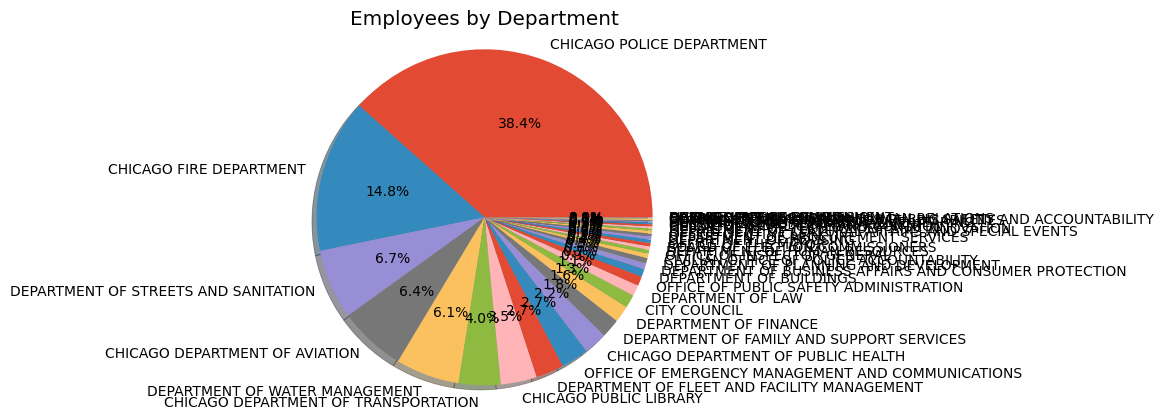

In [41]:
# Import matplotlib
import matplotlib.pyplot as plot
%matplotlib inline

# Create labels and data array
labels = department_names
data = department_counts

# Graph pie chart
plot.pie(data, labels=labels, autopct="%1.1f%%", shadow=True)
plot.title("Employees by Department")
#plot.legend(title="Legend", loc="lower left")
plot.axis("equal")
plot.show

### <u>Modify Data: If a Department is Not In the Top 10, Lump as 'Other'</u>

In [42]:
# Make new list of largest 10 names, add "OTHER"

shortened_names = department_names[:10]
shortened_names.append("OTHER")

# Make new list of largets 10 counts, add sum of remaining

shortened_counts = department_counts[:10]
remaining = sum(department_counts[10:])
shortened_counts.append(remaining)

# Print two lists
print(shortened_names)
print(shortened_counts)

['CHICAGO POLICE DEPARTMENT', 'CHICAGO FIRE DEPARTMENT', 'DEPARTMENT OF STREETS AND SANITATION', 'CHICAGO DEPARTMENT OF AVIATION', 'DEPARTMENT OF WATER MANAGEMENT', 'CHICAGO DEPARTMENT OF TRANSPORTATION', 'CHICAGO PUBLIC LIBRARY', 'DEPARTMENT OF FLEET AND FACILITY MANAGEMENT', 'OFFICE OF EMERGENCY MANAGEMENT AND COMMUNICATIONS', 'CHICAGO DEPARTMENT OF PUBLIC HEALTH', 'OTHER']
[12257, 4715, 2148, 2054, 1957, 1285, 1108, 857, 848, 710, 3959]


### <u>Visualization: Pie Chart of Number of Employees by Department (Fixed)</u>

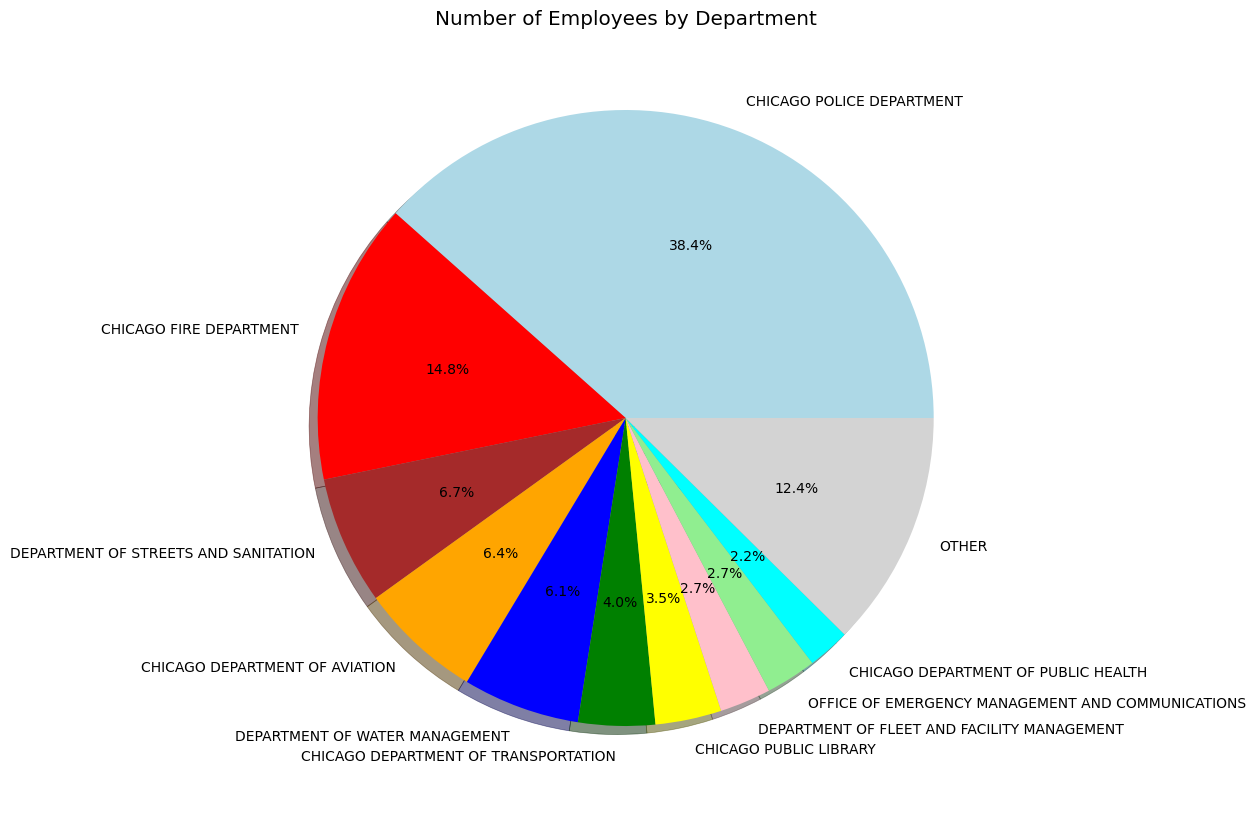

In [43]:
# Import matplotlib
import matplotlib.pyplot as plot
%matplotlib inline

# Graph details
plot.figure(figsize=(10,10))
plot.title("Number of Employees by Department")
plot.style.use("ggplot")
colors_array = ["lightblue", "red", "brown", "orange", "blue", "green", "yellow", "pink", "lightgreen", "cyan", "lightgray"]

# Create pie chart
    # plot.pie(data array, labels array, color array, percentages, shadow)
plot.pie(shortened_counts, labels=shortened_names, colors=colors_array, autopct="%1.1f%%", shadow=True)
#plot.legend(title="Legend), loc="lower_left")
plot.show()

### <u>Question: What is the mean (average) salary in each department in the City of Chicago?</u>

In [58]:
# Group each department
dept_salary_avg = salary_DF["Annual Salary"].groupby(salary_DF["Department"]).mean()
dept_salary_avg

Department
BOARD OF ELECTION COMMISSIONERS                               63158.190857
BOARD OF ETHICS                                              121566.857143
CHICAGO ANIMAL CARE AND CONTROL                               78009.600000
CHICAGO COMMISSION ON HUMAN RELATIONS                        109761.333333
CHICAGO DEPARTMENT OF AVIATION                                89394.835836
CHICAGO DEPARTMENT OF PUBLIC HEALTH                           99064.068085
CHICAGO DEPARTMENT OF TRANSPORTATION                         108105.042016
CHICAGO FIRE DEPARTMENT                                      108116.002867
CHICAGO POLICE BOARD                                          97944.000000
CHICAGO POLICE DEPARTMENT                                    108479.890927
CHICAGO PUBLIC LIBRARY                                        83165.076326
CITY COUNCIL                                                  84591.833866
CITY TREASURER'S OFFICE                                      104708.914286
CIVILIAN OFFIC

**<u>Your Answer:</u>** *Write a complete sentence that addresses the question here.*

### <u>Modify Data: Create a List of Departments and a List of Their Average Annual Salaries</u>

These two lists will be useful when plotting.

In [59]:
# Array of department names sorted by the average salary

dept_names_avg = dept_salary_avg.index.tolist()

# Array of salaries sorted by department

dept_avg = dept_salary_avg.tolist()

print(dept_names_avg)
print(dept_avg)

['BOARD OF ELECTION COMMISSIONERS', 'BOARD OF ETHICS', 'CHICAGO ANIMAL CARE AND CONTROL', 'CHICAGO COMMISSION ON HUMAN RELATIONS', 'CHICAGO DEPARTMENT OF AVIATION', 'CHICAGO DEPARTMENT OF PUBLIC HEALTH', 'CHICAGO DEPARTMENT OF TRANSPORTATION', 'CHICAGO FIRE DEPARTMENT', 'CHICAGO POLICE BOARD', 'CHICAGO POLICE DEPARTMENT', 'CHICAGO PUBLIC LIBRARY', 'CITY COUNCIL', "CITY TREASURER'S OFFICE", 'CIVILIAN OFFICE OF POLICE ACCOUNTABILITY', 'COMMUNITY COMMISSION FOR PUBLIC SAFETY AND ACCOUNTABILITY', 'DEPARTMENT OF ADMINISTRATIVE HEARING', 'DEPARTMENT OF BUILDINGS', 'DEPARTMENT OF BUSINESS AFFAIRS AND CONSUMER PROTECTION', 'DEPARTMENT OF CULTURAL AFFAIRS AND SPECIAL EVENTS', 'DEPARTMENT OF ENVIRONMENT', 'DEPARTMENT OF FAMILY AND SUPPORT SERVICES', 'DEPARTMENT OF FINANCE', 'DEPARTMENT OF FLEET AND FACILITY MANAGEMENT', 'DEPARTMENT OF HOUSING', 'DEPARTMENT OF HUMAN RESOURCES', 'DEPARTMENT OF LAW', 'DEPARTMENT OF PLANNING AND DEVELOPMENT', 'DEPARTMENT OF PROCUREMENT SERVICES', 'DEPARTMENT OF STRE

### <u>Visualization: Bar Chart of Average Annual Salary by Department</u>
#### <u>Sorted by Department Name</u>

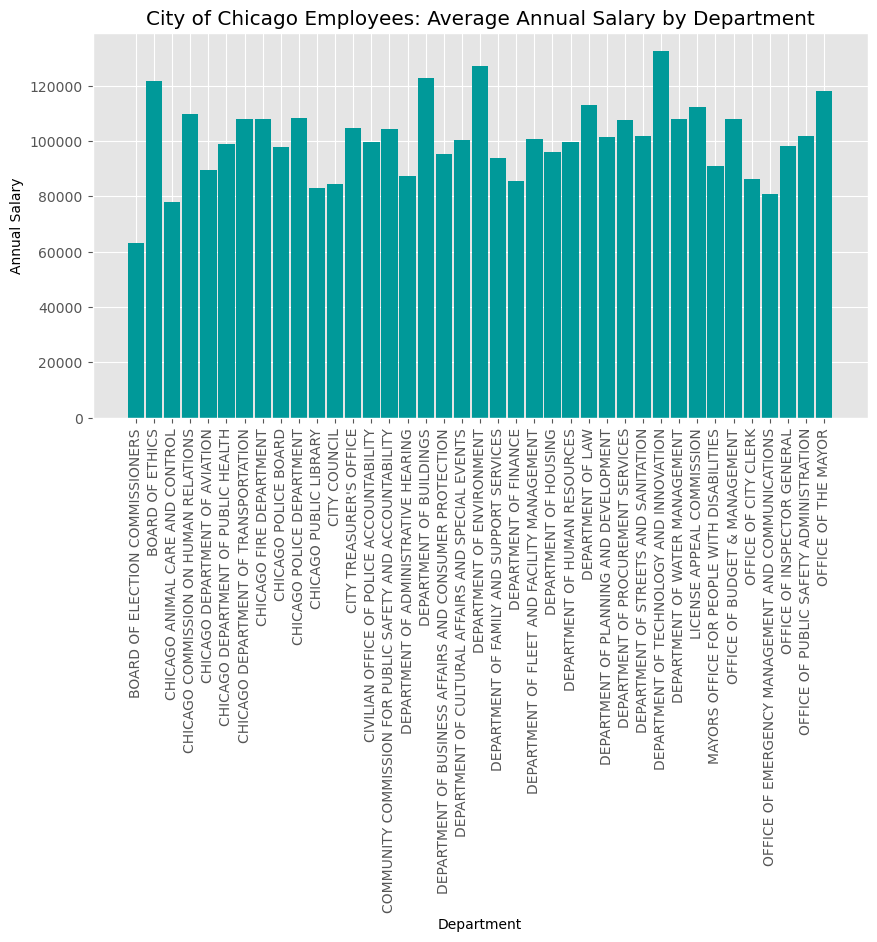

In [60]:
# Import matplotlib
import matplotlib.pyplot as plot
%matplotlib inline

# Graph details
plot.style.use("ggplot")
plot.figure(figsize=(10,5))
plot.title("City of Chicago Employees: Average Annual Salary by Department")
plot.xlabel("Department")
plot.ylabel("Annual Salary")

length = len(dept_names_avg)
bar_pos = np.arange(1, length+1)  # numpy array of numbers [1-36]
plot.xticks(bar_pos, dept_names_avg, rotation=90)
width = 0.9

# Bar graph
plot.bar(bar_pos, dept_avg, width, color="#009999")
plot.show()

### <u>Modify Data: Merge Our Two Lists Into a List of Tuples, Then Sort</u>

By sorting, we can get a nicer plot.

In [61]:
# List of tuples in the form (names, average salary)

sorted_average_list = []

for i in range(len(dept_names_avg)):
     sorted_average_list.append((dept_names_avg[i],dept_avg[i]))
        
# Sort the list in reverse

sorted_average_list.sort(key = lambda x: x[1], reverse=True)

# Print

sorted_average_list


[('DEPARTMENT OF TECHNOLOGY AND INNOVATION', 132457.66153846154),
 ('DEPARTMENT OF ENVIRONMENT', 127252.8),
 ('DEPARTMENT OF BUILDINGS', 122884.11370212765),
 ('BOARD OF ETHICS', 121566.85714285714),
 ('OFFICE OF THE MAYOR', 117937.91489361702),
 ('DEPARTMENT OF LAW', 112885.37764350453),
 ('LICENSE APPEAL COMMISSION', 112260.0),
 ('CHICAGO COMMISSION ON HUMAN RELATIONS', 109761.33333333333),
 ('CHICAGO POLICE DEPARTMENT', 108479.89092695709),
 ('CHICAGO FIRE DEPARTMENT', 108116.00286744432),
 ('CHICAGO DEPARTMENT OF TRANSPORTATION', 108105.04201591513),
 ('DEPARTMENT OF WATER MANAGEMENT', 108065.40626373627),
 ('OFFICE OF BUDGET & MANAGEMENT', 107941.33333333333),
 ('DEPARTMENT OF PROCUREMENT SERVICES', 107425.57142857143),
 ("CITY TREASURER'S OFFICE", 104708.91428571429),
 ('COMMUNITY COMMISSION FOR PUBLIC SAFETY AND ACCOUNTABILITY',
  104460.63157894737),
 ('DEPARTMENT OF STREETS AND SANITATION', 101772.42580645162),
 ('OFFICE OF PUBLIC SAFETY ADMINISTRATION', 101708.20655172414),
 

### <u>Visualization: Another Bar Chart of Average Annual Salary by Department</u> 

#### <u>Sorted by Average Annual Salary</u>

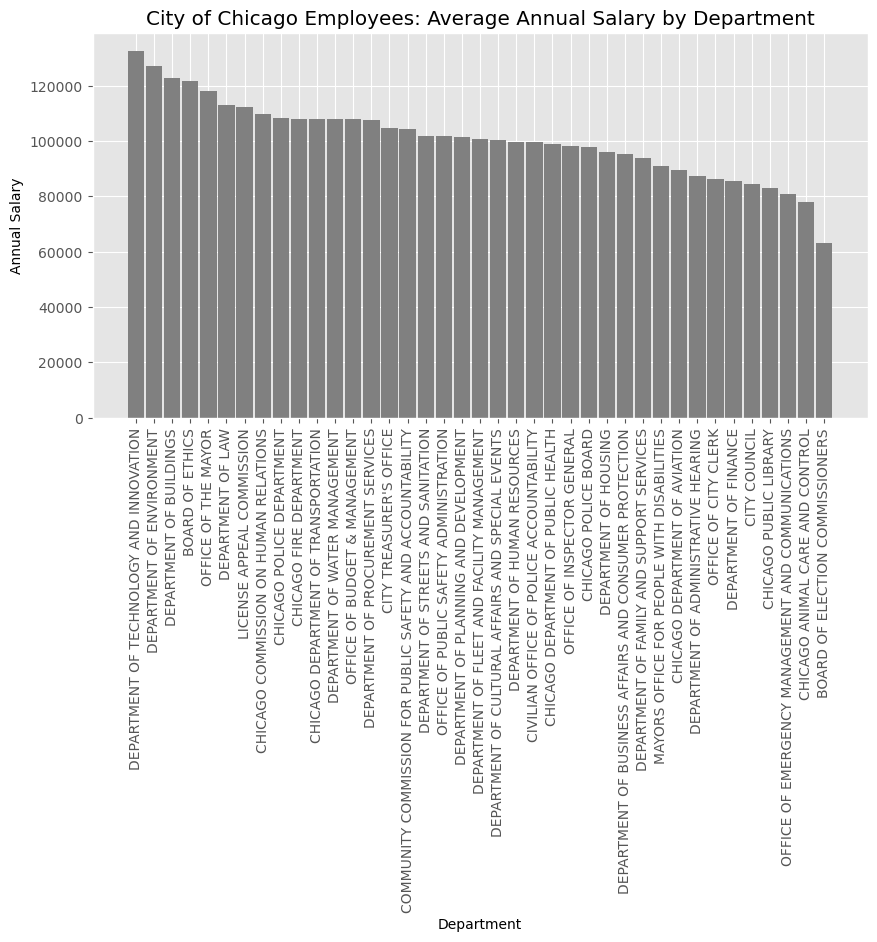

In [62]:
# Import matplotlib and numpy
import matplotlib.pyplot as plot
%matplotlib inline
import numpy as np

# Graph details
plot.style.use("ggplot")  #fivethirty eight, bmh; grayscale, dark_background, ggplot
plot.figure(figsize=(10,5))
plot.title('City of Chicago Employees: Average Annual Salary by Department')
plot.ylabel('Annual Salary')
plot.xlabel('Department')

# Create lists of sorted departements and total sums
x_data = [tuple[0] for tuple in sorted_average_list]
y_data = [tuple[1] for tuple in sorted_average_list]

length = len(sorted_average_list)
bar_pos = np.arange(1, length+1)  # numpy array of numbers [1-36]
plot.xticks(bar_pos, x_data, rotation=90)
width = 0.9

plot.bar(bar_pos, y_data, width, color="gray")
plot.show()

**<u>Task:</u>** Explain what this code is doing: 
        
        x_data = [tuple[0] for tuple in sorted_average_list]

You can use this link as a resource for your explanation: 
https://www.pythonforbeginners.com/basics/list-comprehensions-in-python

**<u>Your Answer:</u>** *Write a complete sentence that addresses the question here.*

### <u>Question: What is the total salary expenditure in each department in the City of Chicago?</u>

In [64]:
# List of each departments total salary spending
dept_salary_sum = salary_DF["Annual Salary"].groupby(salary_DF["Department"]).sum()
dept_salary_sum

Department
BOARD OF ELECTION COMMISSIONERS                              6.631610e+06
BOARD OF ETHICS                                              8.509680e+05
CHICAGO ANIMAL CARE AND CONTROL                              4.680576e+06
CHICAGO COMMISSION ON HUMAN RELATIONS                        1.975704e+06
CHICAGO DEPARTMENT OF AVIATION                               7.214163e+07
CHICAGO DEPARTMENT OF PUBLIC HEALTH                          6.984017e+07
CHICAGO DEPARTMENT OF TRANSPORTATION                         4.075560e+07
CHICAGO FIRE DEPARTMENT                                      5.097670e+08
CHICAGO POLICE BOARD                                         1.958880e+05
CHICAGO POLICE DEPARTMENT                                    1.324756e+09
CHICAGO PUBLIC LIBRARY                                       6.428660e+07
CITY COUNCIL                                                 2.647724e+07
CITY TREASURER'S OFFICE                                      3.664812e+06
CIVILIAN OFFICE OF POLICE A

**<u>Your Answer:</u>** *Write a complete sentence that addresses the question here. It is okay to refer the reader to the table, since it might be time consuming to list out every department in the City of Chicago.*

### <u>Modify Data: Create a Sorted List of Tuples</u>

In [65]:
#List of department names

department_names_sum = dept_salary_sum.index.tolist()

# List of department total salary spending

department_sum = dept_salary_sum.tolist()

# Create list a tuples in form (department name, department total salary spendi
 # 'zip' binds two parallel arrays into tuples
sorted_sum_list = list(zip(department_names_sum, department_sum))
# Sort the list by total sums, in reverse

sorted_sum_list.sort(key = lambda x: x[1], reverse=True)
sorted_sum_list

[('CHICAGO POLICE DEPARTMENT', 1324756428.0),
 ('CHICAGO FIRE DEPARTMENT', 509766953.52),
 ('CHICAGO DEPARTMENT OF AVIATION', 72141632.52),
 ('CHICAGO DEPARTMENT OF PUBLIC HEALTH', 69840168.0),
 ('CHICAGO PUBLIC LIBRARY', 64286604.0),
 ('OFFICE OF EMERGENCY MANAGEMENT AND COMMUNICATIONS', 55129492.08),
 ('DEPARTMENT OF FINANCE', 41590824.0),
 ('CHICAGO DEPARTMENT OF TRANSPORTATION', 40755600.84),
 ('DEPARTMENT OF WATER MANAGEMENT', 39335807.88),
 ('DEPARTMENT OF LAW', 37365060.0),
 ('DEPARTMENT OF FAMILY AND SUPPORT SERVICES', 32476956.0),
 ('DEPARTMENT OF STREETS AND SANITATION', 31549452.0),
 ('DEPARTMENT OF BUILDINGS', 28877766.72),
 ('CITY COUNCIL', 26477244.0),
 ('OFFICE OF PUBLIC SAFETY ADMINISTRATION', 23596303.92),
 ('DEPARTMENT OF BUSINESS AFFAIRS AND CONSUMER PROTECTION', 18116076.0),
 ('DEPARTMENT OF FLEET AND FACILITY MANAGEMENT', 16801622.64),
 ('DEPARTMENT OF PLANNING AND DEVELOPMENT', 15646176.0),
 ('CIVILIAN OFFICE OF POLICE ACCOUNTABILITY', 13633188.0),
 ('OFFICE OF IN

### <u>Visualization: Bar Chart of Total Annual Salary Expenditure by Department</u>

#### <u>Sorted by Total Expenditure</u>
* y-axis expressed in billions of dollars (1 x 10^9 or 1e9)

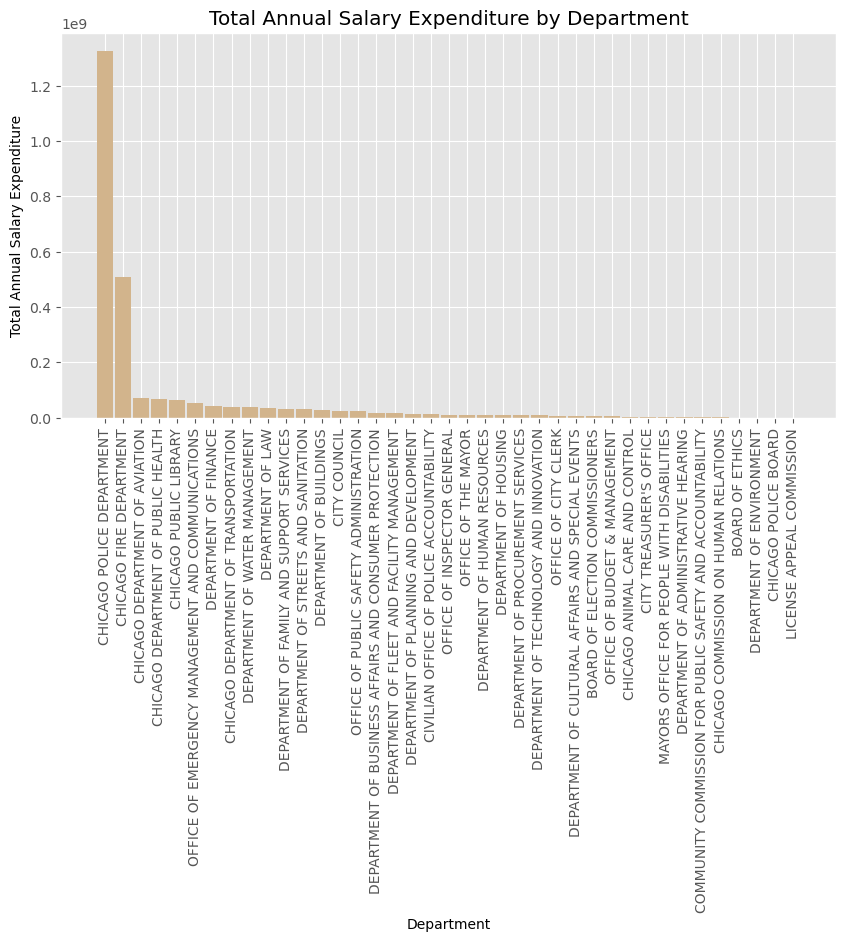

In [66]:
# Import matplotlib and numpy
import matplotlib.pyplot as plot
%matplotlib inline
import numpy as np

# Graph details
plot.style.use("ggplot")  #fivethirty eight, bmh; grayscale, dark_background, ggplot
plot.figure(figsize=(10,5))
plot.title('Total Annual Salary Expenditure by Department')
plot.ylabel('Total Annual Salary Expenditure')
plot.xlabel('Department')

# Create lists of sorted departements and total sums
x_data = [tuple[0] for tuple in sorted_sum_list]
y_data = [tuple[1] for tuple in sorted_sum_list]

length = len(sorted_sum_list)
bar_pos = np.arange(1, length+1)  # numpy array of numbers [1-36]
plot.xticks(bar_pos, x_data, rotation=90)
width = 0.9

# Bar graph
plot.bar(bar_pos, y_data, width, color="tan")

plot.show()

# <u>Open Data Example #2: School District Revenue and Enrollment</u>

*Source for Data Set:* The United States Census Bureau (via data.gov)

*URL for Data Set:* https://www.census.gov/data/tables/2019/econ/school-finances/secondary-education-finance.html

*Note:* You should get this dataset from Schoology, not the URL. The Schoology file has been cleaned to remove outliers (for example, districts with 0 students or 0 revenue).

*Description of Data Set:* This data has school enrollment versus total revenue for every school district in the United States in 2015 (the most recent data available).

*File Format for Data Set:* CSV file (Comma Separated Values)

*Age of Data Set:* 10/8/2021, accessed 4/5/2022

Read in the data:

In [67]:
#Import pandas
import pandas as pd
# Read the csv file (comma separated values)
enrollment_DF = pd.read_csv('Enrollment_Revenue_2019.csv')
# Print last three entries
enrollment_DF[-3:]

,NAME,Total Enrollment,Total Revenue
13265,ZUMBROTA-MAZEPPA SCH DISTRICT 2805,1204,17279
13266,ZUNI SCHOOL DISTRICT,1268,20295
13267,ZURICH ELEM DIST 17,21,391


Now plot:

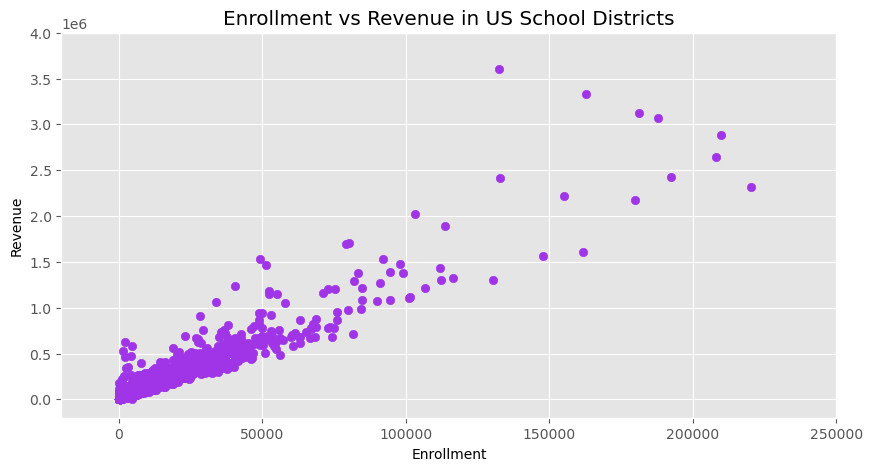

In [68]:
# Import matplotlib
import matplotlib.pyplot as plot
%matplotlib inline

#enrollmentDF.plot(kind='scatter', x='Enrollment', y='Total Revenue');

# Graph details
plot.style.use("ggplot")  #fivethirty eight, bmh; grayscale, dark_background, ggplot
plot.figure(figsize=(10,5))
plot.title('Enrollment vs Revenue in US School Districts')
plot.ylabel('Revenue')
plot.xlabel('Enrollment')

x_data = enrollment_DF["Total Enrollment"]
y_data = enrollment_DF["Total Revenue"]
plot.xlim([-20000,250000])
plot.ylim([-200000,4000000])

# Scatter plot
plot.scatter(x_data, y_data, color="#A035E8")


plot.show()

### <u>Question: What seems to be the relationship between the number of students enrolled in a school district and the revenue of the district?</u>

### <u>Linear Regression</u>
* Modeling the relationship between two variables using a linear equation (straight line)
* Equation for a line in slope-intercept form:
    * y = mx + b
        * m = slope
        * b = y-intercept

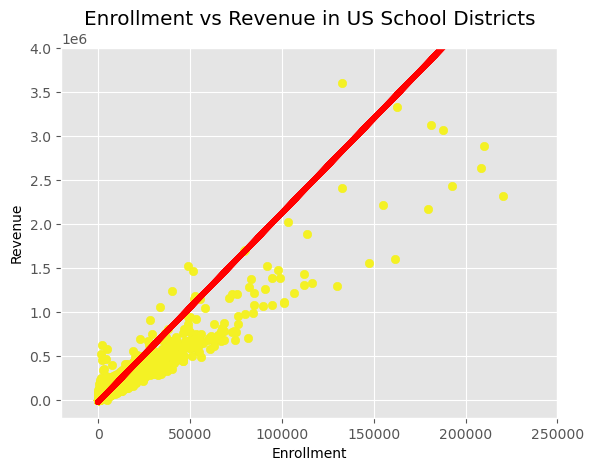

In [69]:
# Import matplotlib and numpy
import matplotlib.pyplot as plot
%matplotlib inline
import numpy as np

# Graph details
plot.title('Enrollment vs Revenue in US School Districts')
plot.ylabel('Revenue')
plot.xlabel('Enrollment')

x_data = enrollment_DF["Total Enrollment"]
y_data = enrollment_DF["Total Revenue"]
plot.xlim([-20000,250000])
plot.ylim([-200000,4000000])

# Use np.polyfit to calculate the slope and y-intercept for the 'line of best fit'
m, b = np.polyfit(x_data, y_data, 1)

# Scatter Plot
    # plot.plot(variable, equation, line width, color)
plot.plot(x_data, m*x_data + b, linewidth=4, color="red")
plot.scatter(x_data, y_data, color="#F4F124")

plot.show()

**<u>Your Answer:</u>** *Write a complete sentence that addresses the question here. You might refer to what you see in the plot above.*

### <u>Question: Explain the meaning of the code in the cell below. Then run it and interpret the resulting output.</u>

In [70]:
x0 = 125000
print(m*x0 + b)

2663096.67618859


**<u>Your Answer:</u>** *Write a complete sentence that addresses the question here.*

In [ ]:
#Based off of the graphs and the evidence provided, the number being produced is the rate of how much students are enrolling per revenue.